In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [21]:
df = pd.read_csv('AmesHousing.csv')
df.shape

(2930, 82)

In [22]:
df[df.isna().any(axis=1)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [23]:
#Identification of features with most of the 60% of missing values
def null_features_identification(df):
    columnas = df.columns    
    drop_columns = []
    for i in columnas:
        if len(df[df[i].isna()])/(len(df)) > 0.6:
            drop_columns.append(i)
    return drop_columns

null_columns = null_features_identification(df)
print(null_columns)

['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']


In [24]:
#Let's make a list of columns to drop, to have a model with less features.
#the first are going to be the features with more than 60% of missing values and the identifiers columns 'Oder' and 'PID'AmesHousing.csv
drop_columns = null_columns + ['Order', 'PID']

In [25]:
df_1 = df.drop(columns=drop_columns)
df_1

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [26]:
# Now it's time to separate the two classes of variables (continuos and categorical) to discard to discard
#Variable with low variance which provides poor information about the SalePrice of Homes
numeric_cols = df_1.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_1.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['SalePrice', 'PID', 'Order' ]]

In [27]:
def low_variance_numeric_features(df, columns_names, threshold=0.05):
    variance_columns = {}

    for col in columns_names:
        if df[col].mean() != 0:
            cv = df[col].std() / abs(df[col].mean())
            variance_columns[col] = cv

    variance_columns = pd.DataFrame(list((variance_columns).items()))
    variance_columns.columns = ['Feature', 'Variance']
    feature_names = variance_columns[variance_columns['Variance']<=threshold]['Feature']
    return list(feature_names)

low_numeric_feature_variance = low_variance_numeric_features(df_1, numeric_cols)
low_numeric_feature_variance
# numeric_parameters_var.columns = ['Feature', 'Variance']
# low_numeric_param_var = numeric_parameters_var[numeric_parameters_var['Variance'] <= 0.1]

['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

In [36]:
def low_variance_categorical_features(df, columns_names, threshold=0.95):
    variance_columns = {}

    for col in columns_names:
        variance_columns[col] = df[col].value_counts(normalize=True).max()
        
    
    variance_columns = pd.DataFrame(list((variance_columns).items()))
    variance_columns.columns = ['Feature', 'Frequency']
    feature_names = variance_columns[variance_columns['Frequency']>threshold]['Feature']
    return list(feature_names)

low_categorical_feature_variance = low_variance_categorical_features(df_1, categorical_cols)
low_categorical_feature_variance

['Street',
 'Utilities',
 'Land Slope',
 'Condition 2',
 'Roof Matl',
 'Heating',
 'Garage Cond']

In [41]:
# Elimination of low variance features of the data set. These variables don't bring enought information and generates noise
df_2 = df_1.drop(columns=low_numeric_feature_variance+low_categorical_feature_variance)
df_2.shape

(2930, 64)

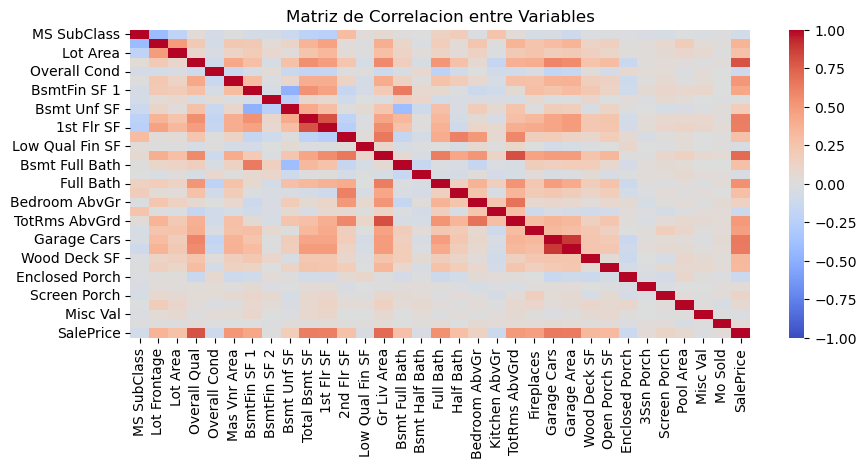

In [50]:
correlation_matrix = df_2.corr(numeric_only=True)

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Matriz de Correlacion entre Variables')
plt.show()

In [69]:
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
corr_feature = correlation_matrix.where(mask)
high_corr = [column for column in corr_feature.columns if any(corr_feature[column].abs() > 0.8)]

print("Variables with high correlation: ", high_corr)

Variables with high correlation:  ['1st Flr SF', 'TotRms AbvGrd', 'Garage Area']
